In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
from keras import models, layers, optimizers
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences, to_categorical
import pandas as pd
from sklearn import preprocessing
# Load the data
df=pd.read_csv("/content/drive/MyDrive/College/DL/Assignment2/IMDB_Dataset.csv")



In [5]:
train_df = df.sample(frac=0.8, random_state=25)
test_df = df.drop(train_df.index)
print(train_df)
print(test_df)

                                                  review sentiment
13920  Kudos to Fawcett to taking on roles that, at t...  positive
23439  If you are a fan of early Duke movies, this Lo...  positive
11851  I'd love to give this movie a 10/10, but in it...  positive
8278   The credits at the end read "ALL directed by S...  negative
31258  This young filmmaker has a talent for capturin...  positive
...                                                  ...       ...
38608  I just got back from a screening a couple of h...  positive
48009  OK, I don't want to upset anyone who enjoyed t...  negative
9184   i just watched the movie i was afraid it's gon...  positive
49448  There are few films that leave me with the fee...  positive
11381  I watched this movie with my boyfriend, an avi...  negative

[40000 rows x 2 columns]
                                                  review sentiment
20     After the success of Die Hard and it's sequels...  positive
22     What an absolutely stunning m

In [6]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'].tolist())

# Convert the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df['review'].tolist())
test_sequences = tokenizer.texts_to_sequences(test_df['review'].tolist())

# Pad the sequences to a fixed length
max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Convert the labels to categorical
label_encoder = preprocessing.LabelEncoder()
train_labels= label_encoder.fit_transform(train_df['sentiment'])
#train_labels = to_categorical(train_df['sentiment'])


In [21]:
model = models.Sequential()
model.add(layers.Embedding(10000, 64, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2)),
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [22]:
 model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1000/1000 [==============================] - 19s 19ms/step - loss: 0.3230 - accuracy: 0.8664 - val_loss: 0.3228 - val_accuracy: 0.8614
Epoch 2/5
1000/1000 [==============================] - 18s 18ms/step - loss: 0.1270 - accuracy: 0.9572 - val_loss: 0.4304 - val_accuracy: 0.8453
Epoch 3/5
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.5872 - val_accuracy: 0.8434
Epoch 4/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.7039 - val_accuracy: 0.8426
Epoch 5/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.7569 - val_accuracy: 0.8419


In [25]:
test_labels= label_encoder.fit_transform(test_df['sentiment'])
print(test_labels[2])
#test_labels = to_categorical(test_df['sentiment'])
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


0
313/313 [==============================] - 1s 2ms/step - loss: 0.7559 - accuracy: 0.8475
Test accuracy: 0.8475000262260437


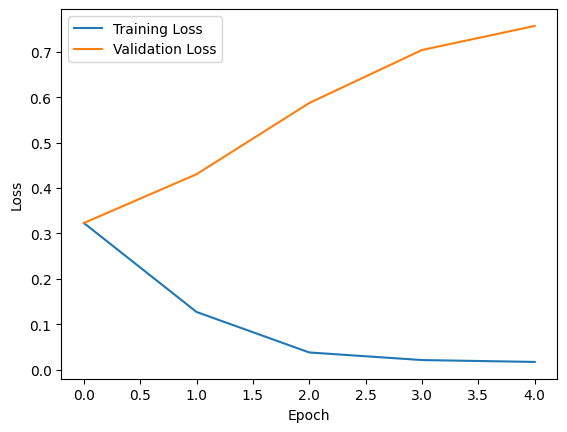

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


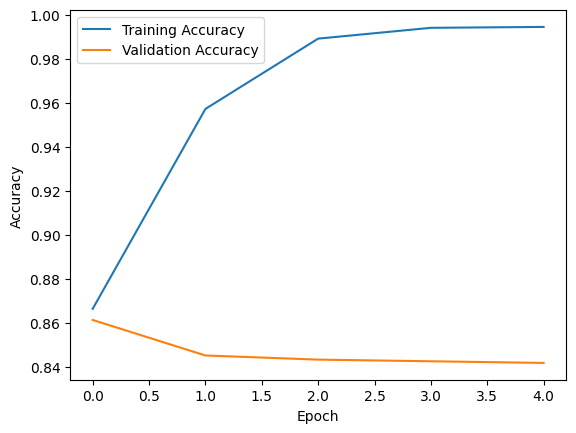

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [14]:
text = tokenizer.sequences_to_texts(test_data)

In [15]:
pred = np.zeros(len(predictions))
for i, score in enumerate(predictions):
    pred[i] = np.round(score)
    
predicted_sentiments = ['positive' if label == 1 else 'negative' for label in pred]    

In [20]:
print(f"Review text: {text[5]}\n")
print(f"Review : {predicted_sentiments[5]}")


Review text: treatment but it is rather refreshing watching the fight scenes here with its wide shots to highlight clarity and detail between the partners and the use of slow motion only to showcase stunts in different angles you may find the speed of fights a tad too slow with some pause in between moves but with and his style being used ad in hollywood flicks they sure don't make fight scenes like they used to return to the chamber gets a repeat screening on monday so if you're game for a nostalgic trip down memory lane what are you waiting for

Review : positive
